# Pythonを使ったデータ処理・プロット実習
## スペクトル編
by konkon

## インポート

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

## データの読み込み
ジルコンの粉末XRD解析データ。下のサイトから取得。
https://rruff.info/zircon/display=default/R050034

In [81]:
df = pd.read_csv('Zircon__R050034-1__Powder__Xray_Data_XY_Processed__4054.txt',header=None)

## スペクトルのプロット

In [82]:
# 1列目が2theta, 2列目がintensityなのでそれぞれリストとして読む
theta = df.iloc[:,0]
intensity = df.iloc[:,1]

(5.0, 90.0)

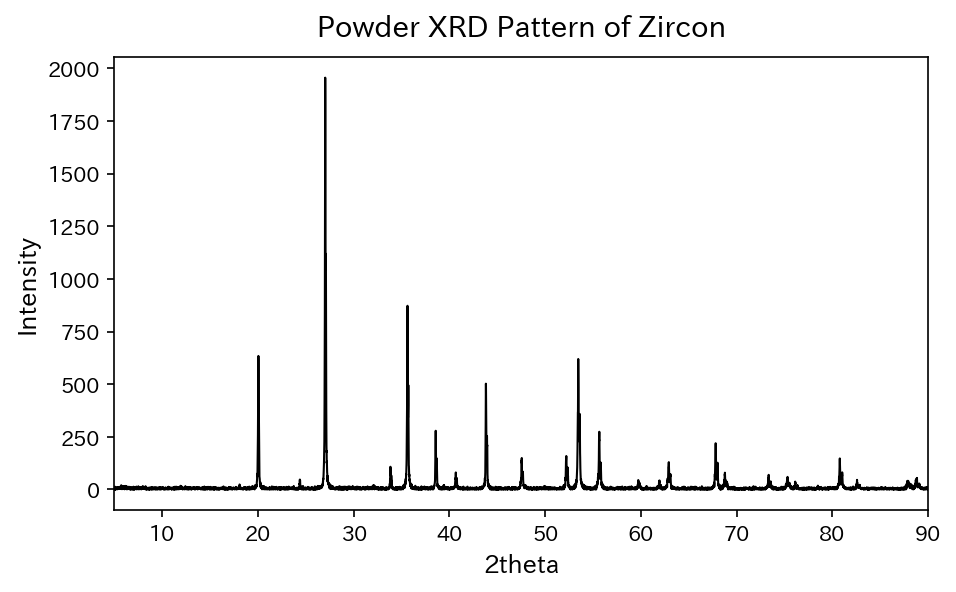

In [83]:
fig = plt.figure(figsize=(7,4),dpi=150)
plt.plot(theta,intensity,lw=1,c='black')
plt.title('Powder XRD Pattern of Zircon',pad=10,fontsize=14)
plt.xlabel('2theta',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.xlim(min(theta),max(theta))

## 理論的な回折ピークを読み込み
対応する物質の理論的な解説ピークをMaterials Projectからjson形式で取得。
https://materialsproject.org/materials/mp-4820/

In [84]:
dic = {}
with open("mp-4820_xrd_Cu.json", mode="r") as f:
    dic = json.load(f)

In [85]:
# 中身を確認
# 左から回折強度, 回折面のミラー指数, 2θ, 面間隔
dic['pattern'][0]

[42.49297350727222, [1, 0, 1], 19.77822328652536, 4.4888291562870615]

## 理論的な回折ピークをプロット

(0.0, 150.0)

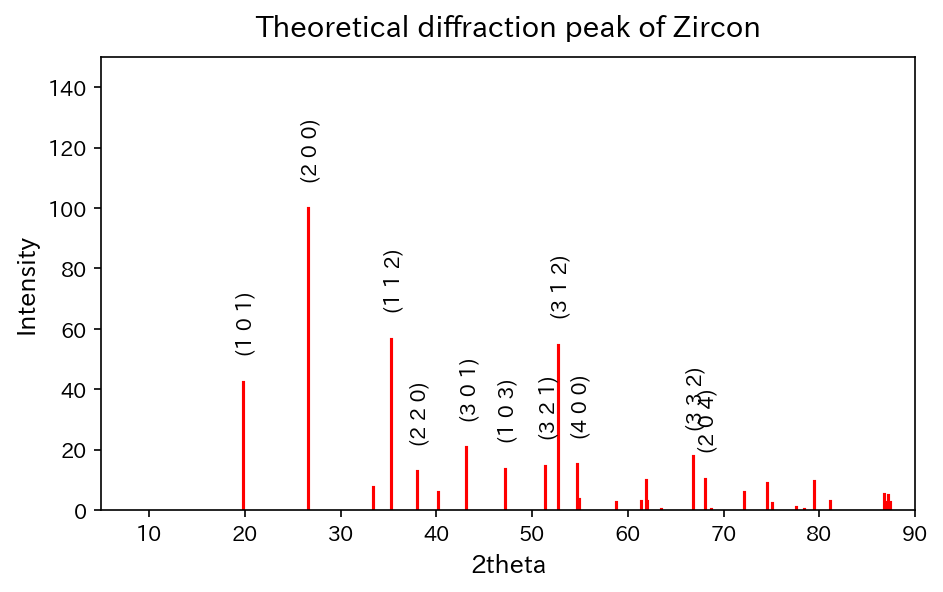

In [86]:
# intensityがこれ以上のピークのミラー指数を表示
th_intensity = 10 

fig = plt.figure(figsize=(7,4),dpi=150)
for i in dic['pattern']:
    if(i[2] < max(theta)):
        idx = str(tuple(i[1])).replace(',','')
        plt.plot([i[2],i[2]], [0,i[0]],c='r')
        if(i[0] > th_intensity):
            plt.text(i[2]-0.8,i[0]+10,idx,rotation=90,fontsize=10)
plt.xlim(min(theta),max(theta))
plt.title('Theoretical diffraction peak of Zircon',pad=10,fontsize=14)
plt.xlabel('2theta',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.ylim(0,150)

## スペクトルと理論的な回折ピークを併せてプロット

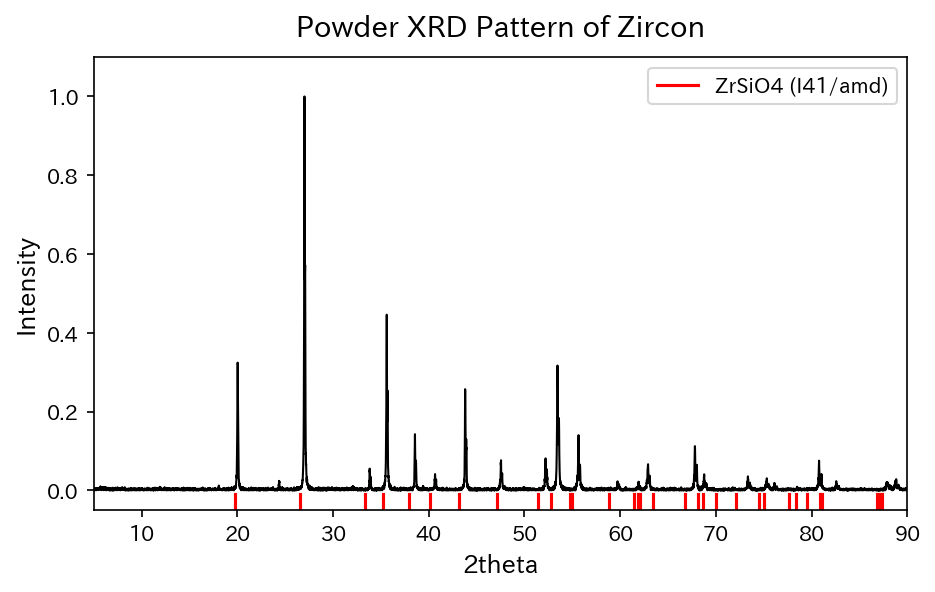

In [87]:
fig = plt.figure(figsize=(7,4),dpi=150)

# 強度を0 ~ 1に規格化してプロット
norm_intensity = (intensity - np.min(intensity))/(np.max(intensity)-np.min(intensity))
plt.plot(theta,norm_intensity,lw=1,c='black')

# 下の部分に理論的なピーク位置を表示
isFirst = True
for i in dic['pattern']:
    if(i[2] < max(theta)):
        idx = str(tuple(i[1])).replace(',','')
        if(isFirst):
            plt.plot([i[2],i[2]], [-0.01,-0.05],c='r',label='ZrSiO4 (I41/amd)')
            isFirst = False
        else:
            plt.plot([i[2],i[2]], [-0.01,-0.05],c='r')

plt.xlim(min(theta),max(theta))
plt.ylim(-0.05,1.1)
plt.title('Powder XRD Pattern of Zircon',pad=10,fontsize=14)
plt.xlabel('2theta',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.legend()